In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sig(matrix):
    return 1/(1+np.exp(-matrix))


In [3]:
X1 = np.matrix(np.random.randn(80,2)*2 + 6)
X2 = np.matrix(np.random.randn(80,2)*2 + 2)

Y1 = np.ones(80)
Y2 = np.zeros(80)

X = np.matrix(np.vstack((X1,X2)))

Y = np.matrix(np.hstack((Y1,Y2))).T

# w = w - X.T@(sig(X@w) - Y)

In [4]:
X = np.column_stack((np.ones(160),X))

In [5]:
w = np.matrix(np.random.randn(3)).T
w

matrix([[ 1.03454033],
        [-1.84682508],
        [-0.21727821]])

In [6]:
err = []
ind = []
for i in range(0,5000):
    w = w - .0001*X.T@(np.matrix(sig(X@w))-Y)
    cost = []
    lsig = np.log(sig(X@w))
    l1sig = np.log(1-sig(X@w))
                
    for j in range(0,len(Y)):
        if Y[j] == 1:
            cost.append(-lsig[j])
        else:
            cost.append(-l1sig[j])
    err.append(float(sum(cost)))
    ind.append(i)


In [7]:
w

matrix([[-4.25130876],
        [ 0.55088796],
        [ 0.55268321]])

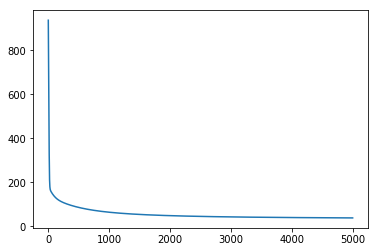

In [8]:
plt.plot(ind,err)

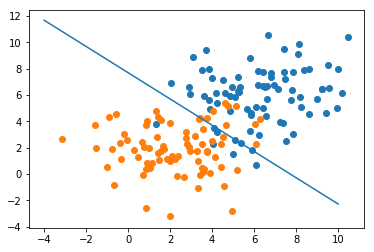

In [9]:
new = np.linspace(-4,10,100)
plt.scatter(np.array(X1[:,0]),np.array(X1[:,1]))
plt.scatter(np.array(X2[:,0]),np.array(X2[:,1]))
plt.plot(new,-(w[0,0] + w[1,0]*new)/w[2,0])
plt.show()

In [61]:
def ROC(X,Y,w):
    threshold = np.linspace(1000,0, 1001)
    threshold = threshold/1000
    tprs = []
    fprs = []
    for i in threshold:
        tprs.append(np.sum(np.multiply((sig(X@w)>i),Y))/np.sum(Y))
        fprs.append(np.sum(np.multiply((sig(X@w)>i),1 - Y))/np.sum(1 - Y))
    plt.plot(fprs,tprs)
    plt.plot([0,1],[0,1], c = 'black')
    plt.xlabel("False Positive Rate",fontsize = 14)
    plt.ylabel("True Positive Rate", fontsize = 14)
    plt.title("ROC", fontsize  = 20)
    leg = "AUC = "+str((np.sum(np.multiply(tprs[0:1000],np.diff(fprs)))+np.sum(np.multiply(tprs[1:1001],np.diff(fprs))))/2)
    plt.text(.58,0,leg, fontsize = 14)
    plt.show()

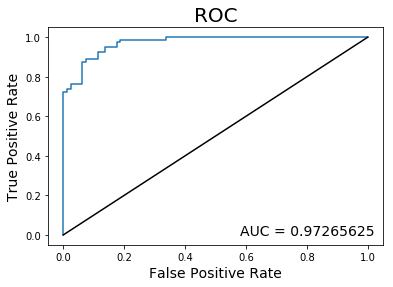

In [62]:
ROC(X,Y,w)